# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [209]:
# Load data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

credit_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)
print(credit_data.shape)
credit_data.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [210]:
# Check the counts
credit_data.count()

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64

In [211]:
# Check for Nan
credit_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [212]:
# Check for null
credit_data.isnull().values.any()

False

In [213]:
# Look at datatypes
credit_data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [216]:
# Check for other data
credit_data[1].unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [0]:
# Remove ? in dataframe
credit_data.replace('?', np.NaN, inplace=True)

In [0]:
# Clean data
credit_data[1]=pd.to_numeric(credit_data[1])
credit_data[15]= credit_data[15].str.replace('+', '1')
credit_data[15]= credit_data[15].str.replace('-', '0')
credit_data.fillna(credit_data.mean(), inplace=True)

In [219]:
# Check types again
credit_data.astype({13: 'float64', 10: 'float64'}).dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10    float64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [220]:
# Look at data
credit_data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1


In [221]:
# Look at correlatioons of numeric data
credit_data.corr()

,1,2,7,10,14
1,1.000000,0.201316,0.392787,0.185575,0.018539
2,0.201316,1.000000,0.298902,0.271207,0.123121
7,0.392787,0.298902,1.000000,0.322330,0.051345
10,0.185575,0.271207,0.322330,1.000000,0.063692
14,0.018539,0.123121,0.051345,0.063692,1.000000


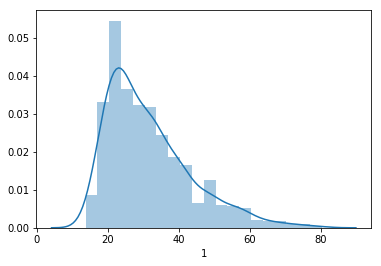

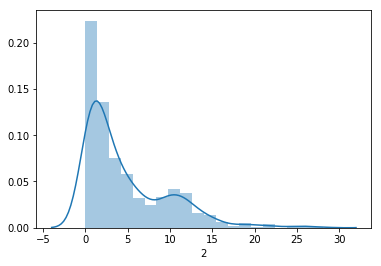

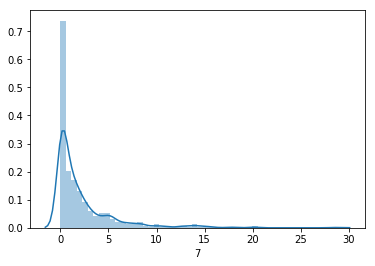

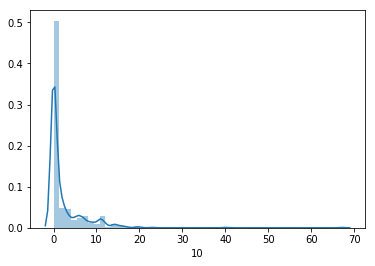

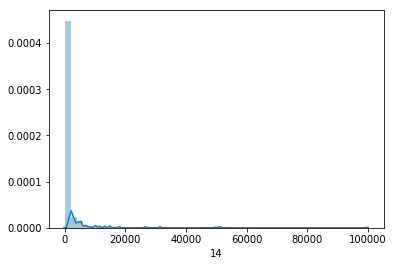

In [222]:
# Plot distributions of numeric data
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
    
plotDistPlot(credit_data[1])
plotDistPlot(credit_data[2])
plotDistPlot(credit_data[7])
plotDistPlot(credit_data[10])
plotDistPlot(credit_data[14])

In [223]:
# Split into success data
success_data = credit_data[credit_data[15] == '1']
success_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [224]:
# Split into failure data
failure_data = credit_data[credit_data[15] == '0']
failure_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,00160,2,0


### T-Tests

In [225]:
# Two sample t-test on success data
# Checking to see if column 2 and column 10 have the same impact - the null hypothesis
from scipy.stats import ttest_ind
import numpy as np

column_2 = success_data.iloc[0:100, 2].values
column_10 = success_data.iloc[0:100, 10].values

c2_mean = np.mean(column_2)
c10_mean = np.mean(column_10)
print('column 2 value:', c2_mean)
print('column 10 value:', c10_mean)
c2_std = np.std(column_2)
c10_std = np.std(column_10)
print('column 2 std value:', c2_std)
print('column 10 std value:', c10_std)
ttest,pval = ttest_ind(column_2, column_10)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

column 2 value: 6.079
column 10 value: 5.73
column 2 std value: 5.490259602241045
column 10 std value: 8.661241250536785
p-value 0.7352518810600128
we accept null hypothesis


In [226]:
# Two sample t-test on success data
# Checking to see if column 1 and column 10 have the same impact - the null hypothesis
from scipy.stats import ttest_ind
import numpy as np

column_1 = success_data.iloc[0:100, 1].values
column_10 = success_data.iloc[0:100, 10].values

c1_mean = np.mean(column_1)
c10_mean = np.mean(column_10)
print('column 1 value:', c1_mean)
print('column 10 value:', c10_mean)
c1_std = np.std(column_1)
c10_std = np.std(column_10)
print('column 1 std value:', c1_std)
print('column 10 std value:', c10_std)
ttest,pval = ttest_ind(column_1, column_10)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

column 1 value: 34.686400000000006
column 10 value: 5.73
column 1 std value: 11.61203630032218
column 10 std value: 8.661241250536785
p-value 4.3416131999182456e-49
we reject null hypothesis


In [227]:
# Two sample t-test on failure data
# Checking to see if column 2 and column 10 have the same impact - the null hypothesis
from scipy.stats import ttest_ind
import numpy as np

column_2 = failure_data.iloc[0:100, 2].values
column_10 = failure_data.iloc[0:100, 10].values

c2_mean = np.mean(column_2)
c10_mean = np.mean(column_10)
print('column 2 value:', c2_mean)
print('column 10 value:', c10_mean)
c2_std = np.std(column_2)
c10_std = np.std(column_10)
print('column 2 std value:', c2_std)
print('column 10 std value:', c10_std)
ttest,pval = ttest_ind(column_2, column_10)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

column 2 value: 4.88415
column 10 value: 0.79
column 2 std value: 5.110200096620483
column 10 std value: 2.2463080821650445
p-value 6.9280484777937444e-12
we reject null hypothesis


In [228]:
# Two sample t-test on failure data
# Checking to see if column 1 and column 10 have the same impact - the null hypothesis
from scipy.stats import ttest_ind
import numpy as np

column_1 = failure_data.iloc[0:100, 1].values
column_10 = failure_data.iloc[0:100, 10].values

c1_mean = np.mean(column_1)
c10_mean = np.mean(column_10)
print('column 1 value:', c1_mean)
print('column 10 value:', c10_mean)
c1_std = np.std(column_1)
c10_std = np.std(column_10)
print('column 1 std value:', c1_std)
print('column 10 std value:', c10_std)
ttest,pval = ttest_ind(column_1, column_10)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

column 1 value: 29.41009026548673
column 10 value: 0.79
column 1 std value: 11.196528396759827
column 10 std value: 2.2463080821650445
p-value 5.290950533221439e-63
we reject null hypothesis


### Chi-square tests

In [229]:
# Expected value for a table
from scipy import stats
import pandas as pd
import numpy as np

# Observed values
contingency_table = pd.crosstab(credit_data[15], credit_data[8], margins=True)
contingency_table


8,f,t,All
15,,,
0,306,77,383
1,23,284,307
All,329,361,690


In [230]:
# Test to create the observed values
contingency_table.iloc[:-1,:-1].values

array([[306,  77],
       [ 23, 284]])

In [231]:
# Run the chi-square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1,:-1])
print(chi_squared, p_value, dof, expected)

355.2038167412799 3.1185900878457007e-79 1 [[182.61884058 200.38115942]
 [146.38115942 160.61884058]]


In [232]:
# Observed values
contingency_table1 = pd.crosstab(credit_data[15], credit_data[9], margins=True)
contingency_table1

# Test to create the observed values
contingency_table1.iloc[:-1,:-1].values

# Run the ch-square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table1.iloc[:-1,:-1])
print(chi_squared, p_value, dof, expected)

143.06956205083148 5.6757273745274924e-33 1 [[219.25362319 163.74637681]
 [175.74637681 131.25362319]]


In [233]:
# Observed values
contingency_table2 = pd.crosstab(credit_data[15], credit_data[12], margins=True)

# Test to create the observed values
contingency_table2.iloc[:-1,:-1].values

# Run the chi-square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table2.iloc[:-1,:-1])
print(chi_squared, p_value, dof, expected)

9.191570451545381 0.010094291370456372 2 [[346.92028986   4.44057971  31.63913043]
 [278.07971014   3.55942029  25.36086957]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The chi-square test shows that columns 8 and 9 have a high impact on the credit acceptance (success), column 12 less so.

The t-tests on the success split shows that columns 2 and 10 have a simlar impact on the success while column 1 and 10 do not.  The t-tests on the failure split show that neither column 1 or 2 have similar impacts on the failure.